In [2]:
from azure.quantum import Workspace
workspace = Workspace (
    subscription_id = "83e0e071-c631-4700-bd13-7c6a2545ab1c",
    resource_group = "azurequantum",
    name = "jcrandall-q",
    location = "eastus"
)


In [3]:
import qsharp.azure
targets = qsharp.azure.connect(
   resourceId="/subscriptions/83e0e071-c631-4700-bd13-7c6a2545ab1c/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/jcrandall-q",
   location="eastus")

Preparing Q# environment...
Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace jcrandall-q in location eastus.


In [4]:
import qsharp

print("This workspace's targets:")
for target in targets:
    print("-", target.id)

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.hqs-lt


# Shor's Algorithm
Given: $M$, the numbers to be factored:
* Step 1: Pick $n$ qubits so that $N = 2^n > M$.
* Step 2: Pick a random $ a < M $.
* Step 3: If $\text{gcd}(a,M) \neq 1$, we've factored $M$, so stop.
* Step 4: If not, use $a$ and $M$ in shor's circuit and obtain and outcome $|y\rangle$ 
* Step 5: Find the close convergents of $\frac{y}{N}$, and thus a guess for $r$.
* Step 6: See if these two conditions are satisfied:
    * $r$ is even.
    * $a^{\frac{r}{2}} + 1 \equiv_M 0 $ is false
    * If not, try a different Step 2 and repeat steps 3-6.
* Step 7: If the conditions are satisfed, attempt to factor $M$ as shown via the numbers $a^{\frac{r}{2}} + 1$ and $a^{\frac{r}{2}} - 1$.
* Repeat as needed to try different $r$ so that at least one provides a $y$ near $\frac{N}{r}$ 


In [5]:
# We declare the function we will define in Q# as a callable so that Python recognizes the symbol.
GenerateRandomBit: any = None

In [23]:
%%qsharp
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Convert;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Math;
open Microsoft.Quantum.Measurement;

# 3 qubit Quantum Fourier Transform

In [24]:
%%qsharp
operation Perform3qubitQFT() : Result[] {

        mutable resultArray = [Zero, size = 3];

        use qs = Qubit[3];

        //QFT:
        //first qubit:
        H(qs[0]);
        Controlled R1([qs[1]], (PI()/2.0, qs[0]));
        Controlled R1([qs[2]], (PI()/4.0, qs[0]));

        //second qubit:
        H(qs[1]);
        Controlled R1([qs[2]], (PI()/2.0, qs[1]));

        //third qubit:
        H(qs[2]);

        SWAP(qs[2], qs[0]);

        Message("Before measurement: ");
        DumpMachine();

        for i in IndexRange(qs) {
            set resultArray w/= i <- M(qs[i]);
        }

        Message("After measurement: ");
        DumpMachine();

        ResetAll(qs);

        return resultArray;
}


In [29]:
# Set the target to ionq.simulator
qsharp.azure.target("ionq.simulator")

# We'll use 100 shots (simulated runs). Timeout is in seconds.
result = qsharp.azure.execute(Perform3qubitQFT, shots=100, jobName="Perform 3 qubit QFT", timeout=240)

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator
Submitting Perform3qubitQFT to target ionq.simulator...


Failed to submit Q# operation Perform3qubitQFT for execution.
Exception has been thrown by the target of an invocation.


AzureError: {'error_code': 1010, 'error_name': 'JobSubmissionFailed', 'error_description': 'Failed to submit the job to the Azure Quantum workspace.'}

In [ ]:
from matplotlib import pyplot

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
_ = pyplot.ylabel("Probability")

# Generate Random Bit

In [26]:
%%qsharp
operation GenerateRandomBit() : Result {
    use target = Qubit();

    // Apply an H-gate and measure.
    H(target);
    return M(target);
}

In [27]:
# Set the target to ionq.simulator
qsharp.azure.target("ionq.simulator")

# We'll use 100 shots (simulated runs). Timeout is in seconds.
result = qsharp.azure.execute(GenerateRandomBit, shots=100, jobName="Generate one random bit", timeout=240)

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator
Submitting GenerateRandomBit to target ionq.simulator...
Job successfully submitted for 100 shots.
   Job name: Generate one random bit
   Job ID: 46e7d411-204e-4b3f-9ea4-ea6c1ed0d420
Waiting up to 240 seconds for Azure Quantum job to complete...
[22:48:29] Current job status: Waiting
[22:48:34] Current job status: Waiting
[22:48:39] Current job status: Waiting
[22:48:44] Current job status: Waiting
[22:48:49] Current job status: Waiting
[22:48:54] Current job status: Waiting
[22:48:59] Current job status: Finishing
[22:49:04] Current job status: Succeeded


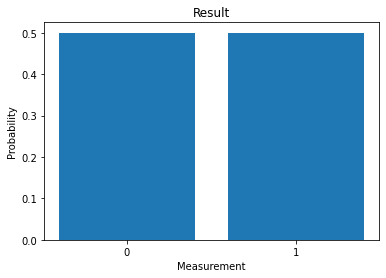

In [28]:
from matplotlib import pyplot

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
_ = pyplot.ylabel("Probability")